# Phase 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\Shaun Alex\\Downloads\\NetflixOriginals.csv", encoding='latin-1')
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [3]:
df.info

<bound method DataFrame.info of                                            Title                  Genre  \
0                                Enter the Anime            Documentary   
1                                    Dark Forces               Thriller   
2                                        The App  Science fiction/Drama   
3                                 The Open House        Horror thriller   
4                                    Kaali Khuhi                Mystery   
..                                           ...                    ...   
579        Taylor Swift: Reputation Stadium Tour           Concert Film   
580  Winter on Fire: Ukraine's Fight for Freedom            Documentary   
581                      Springsteen on Broadway           One-man show   
582    Emicida: AmarElo - It's All For Yesterday            Documentary   
583     David Attenborough: A Life on Our Planet            Documentary   

              Premiere  Runtime  IMDB Score                  Langua

In [4]:
df.describe

<bound method NDFrame.describe of                                            Title                  Genre  \
0                                Enter the Anime            Documentary   
1                                    Dark Forces               Thriller   
2                                        The App  Science fiction/Drama   
3                                 The Open House        Horror thriller   
4                                    Kaali Khuhi                Mystery   
..                                           ...                    ...   
579        Taylor Swift: Reputation Stadium Tour           Concert Film   
580  Winter on Fire: Ukraine's Fight for Freedom            Documentary   
581                      Springsteen on Broadway           One-man show   
582    Emicida: AmarElo - It's All For Yesterday            Documentary   
583     David Attenborough: A Life on Our Planet            Documentary   

              Premiere  Runtime  IMDB Score                  Lang

In [40]:
df.rename(columns = {'IMDB Score':'IMDBScore'}, inplace = True)
df

,Title,Genre,Premiere,Runtime,IMDBScore,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [5]:
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [6]:
df.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

In [7]:
language=df['Language'].value_counts().sort_values(ascending=False)
language=language[:10]
language

Language
English       401
Hindi          33
Spanish        31
French         20
Italian        14
Portuguese     12
Indonesian      9
Korean          6
Japanese        6
German          5
Name: count, dtype: int64

In [8]:
Genre=df["Genre"].value_counts().sort_values(ascending=False)
Genre=Genre[:10]
Genre

Genre
Documentary        159
Drama               77
Comedy              49
Romantic comedy     39
Thriller            33
Comedy-drama        14
Crime drama         11
Biopic               9
Horror               9
Action               7
Name: count, dtype: int64

Text(0.5, 1.0, 'Language vs Genre')

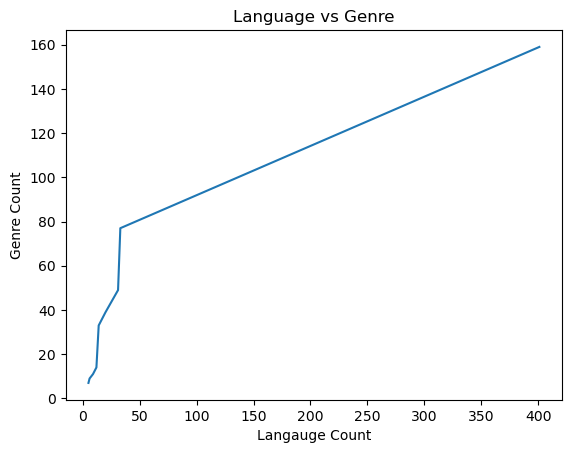

In [9]:
plt.plot(language,Genre)
plt.xlabel("Langauge Count")
plt.ylabel("Genre Count")
plt.title("Language vs Genre")

In [58]:
cols=["IMDBScore","Runtime"]
x=df[cols].head(12)

x.corr()

,IMDBScore,Runtime
IMDBScore,1.00000,0.40416
Runtime,0.40416,1.00000


<Axes: >

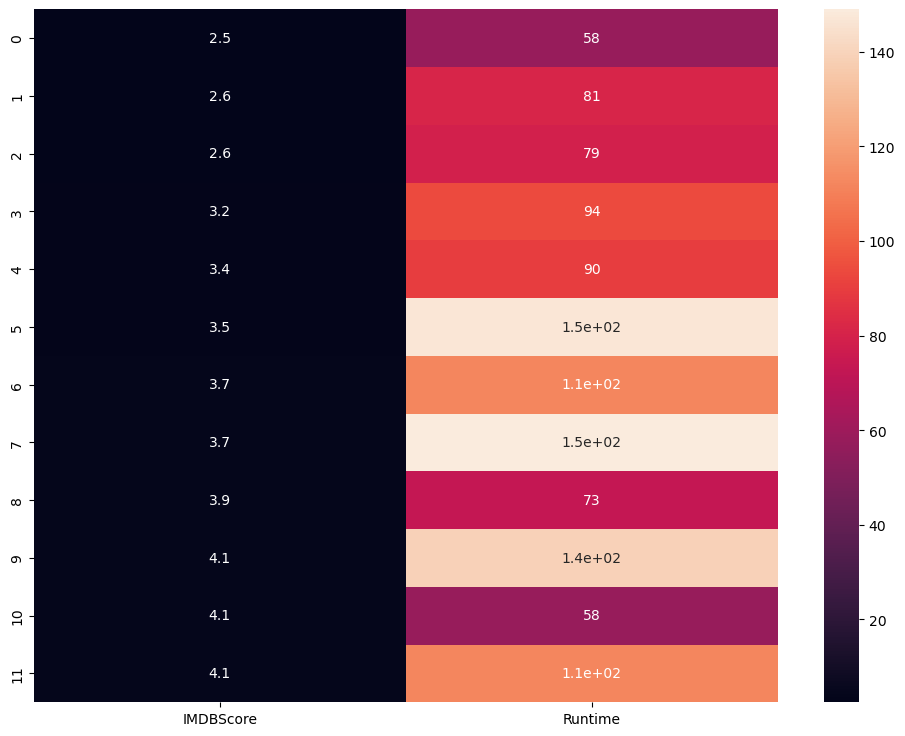

In [60]:
plt.figure(figsize=(12,9))
sns.heatmap(x,annot=True)

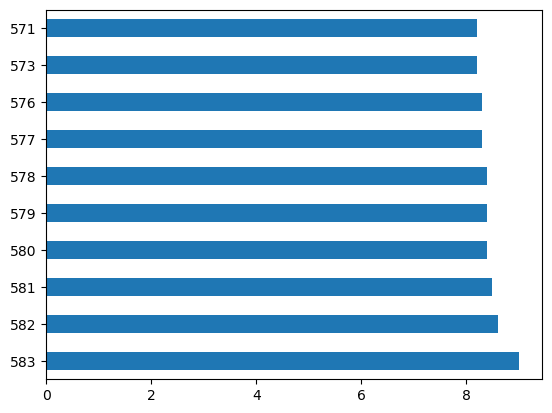

In [62]:
score=df["IMDBScore"].sort_values(ascending=False)[:10]
score.plot.barh()
plt.show()

<Figure size 3000x3000 with 0 Axes>

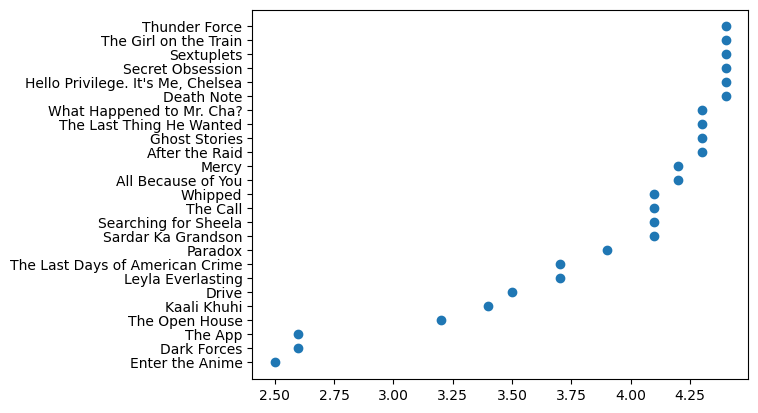

<Figure size 3000x3000 with 0 Axes>

In [72]:
plt.scatter(df["IMDBScore"][:25],df["Title"][:25])
plt.figure(figsize=(30,30))


In [83]:
from sklearn.preprocessing import LabelEncoder
object_cols = ["Title","Genre"]
label_encoder = LabelEncoder()
df2=df.copy()
for col in object_cols:
    label_encoder.fit(df2[col])
    df2[col] = label_encoder.transform(df2[col])
df2

,Title,Genre,Premiere,Runtime,IMDBScore,Language
0,147,45,"August 5, 2019",58,2.5,English/Japanese
1,120,106,"August 21, 2020",81,2.6,Spanish
2,433,93,"December 26, 2019",79,2.6,Italian
3,500,63,"January 19, 2018",94,3.2,English
4,243,73,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,425,40,"December 31, 2018",125,8.4,English
580,575,45,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,410,74,"December 16, 2018",153,8.5,English
582,145,45,"December 8, 2020",89,8.6,Portuguese


In [ ]:
df2.drop(["Premiere"],axis=1,inplace=True)


In [ ]:
df2.drop(["Language"],axis=1,inplace=True)


In [93]:
df2.drop(["IMDBScore"],axis=1,inplace=True)

df2


,Title,Genre,Runtime
0,147,45,58
1,120,106,81
2,433,93,79
3,500,63,94
4,243,73,90
...,...,...,...
579,425,40,125
580,575,45,91
581,410,74,153
582,145,45,89


In [85]:
y=df["IMDBScore"]
y

0      2.5
1      2.6
2      2.6
3      3.2
4      3.4
      ... 
579    8.4
580    8.4
581    8.5
582    8.6
583    9.0
Name: IMDBScore, Length: 584, dtype: float64

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [95]:
xtrain,xtest,ytrain,ytest=train_test_split(df2,y,test_size=0.2,random_state=42)

In [96]:
print(xtrain.shape,ytrain.shape)

(467, 3) (467,)


In [97]:
print(xtest.shape,ytest.shape)

(117, 3) (117,)


In [98]:
lr=LinearRegression()

In [99]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [100]:
lr.fit(xtest,ytest)

LinearRegression()

In [176]:
lr.score(xtrain,ytrain)

0.031119103871776854

In [105]:
y_pred=lr.predict(xtest)
x=[[147,45,58]]
predict=lr.predict(x)
predict

C:\ProgramData\anaconda3navAIMLDS\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.3065107])

In [104]:
print(lr.score(xtest, ytest))


0.019033211731676047


In [127]:
# Assuming df2 is your first DataFrame and df is your second DataFrame

# Filter rows in df2 where 'Title' is equal to 147
filtered_rows_df2 = df2[df2['Title'] == 147]

# Get the indices of the filtered rows
indices = filtered_rows_df2.index

# Use the indices to access the corresponding rows in df
resulting_rows_df = df.loc[indices]

# Now, resulting_rows_df contains the rows from df where 'Title' is equal to 147 in df2
resulting_rows_df


,Title,Genre,Premiere,Runtime,IMDBScore,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese


In [151]:
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
regressor = RandomForestRegressor(n_estimators=100,
                                  random_state=0)
 
# fit the regressor with x and y data
regressor.fit(df2, y)

RandomForestRegressor(random_state=0)

In [152]:
Y_pred = regressor.predict(xtest)

In [153]:
print(regressor.score(xtest, ytest))


0.8844757926660178


In [177]:
print(regressor.score(xtrain, ytrain))

0.8848317625613643


In [154]:
x=[[147,45,58]]
predict=regressor.predict(x)
predict

C:\ProgramData\anaconda3navAIMLDS\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3.752])

In [168]:
from sklearn.metrics import accuracy_score



In [204]:
import numpy as np

# Assuming ytest is a Pandas Series
ytest_array = np.array(ytest)
reshaped_ytest = ytest_array.reshape(-1, 1)
print(reshaped_ytest)

ytpred_array = np.array(y_pred)
reshaped_ypred = ytpred_array.reshape(-1, 1)
print(reshaped_ypred)


[[6.7]
 [6.9]
 [5.3]
 [7.1]
 [7.4]
 [6.4]
 [5.5]
 [6.2]
 [5.6]
 [6.6]
 [7.6]
 [5.2]
 [7.9]
 [5.8]
 [6.9]
 [6.1]
 [6. ]
 [5.4]
 [8.2]
 [5.8]
 [6.6]
 [6. ]
 [2.6]
 [7.7]
 [7.3]
 [5.1]
 [5. ]
 [8.4]
 [7. ]
 [4.6]
 [5.7]
 [6.9]
 [5.2]
 [6.2]
 [5.2]
 [6.4]
 [6.9]
 [6.7]
 [7.1]
 [7.6]
 [6.2]
 [6. ]
 [5.8]
 [4.1]
 [6.9]
 [6.6]
 [3.7]
 [7.2]
 [7.2]
 [7.2]
 [5.4]
 [5.8]
 [5.2]
 [5.8]
 [5.9]
 [6.1]
 [7.6]
 [6.8]
 [7.1]
 [7. ]
 [5.2]
 [6.1]
 [6.5]
 [4.6]
 [5.2]
 [6.4]
 [6.2]
 [6.9]
 [6.5]
 [4.7]
 [5.7]
 [6.5]
 [5.7]
 [5.2]
 [6.7]
 [6.8]
 [5.1]
 [5.2]
 [5.9]
 [7.6]
 [6.8]
 [4.1]
 [5.3]
 [6.6]
 [7.1]
 [5.2]
 [7.1]
 [7. ]
 [6.3]
 [6.3]
 [5.6]
 [7.4]
 [5.7]
 [5.9]
 [6.8]
 [7.3]
 [6.4]
 [4.1]
 [6.5]
 [7.4]
 [6.6]
 [8.1]
 [6.2]
 [5.3]
 [7.3]
 [8.4]
 [6.1]
 [7.6]
 [5.6]
 [5.8]
 [5.7]
 [5.5]
 [6.4]
 [7.8]
 [5.8]
 [7.7]
 [6.6]]
[[6.27382178]
 [6.18355707]
 [6.19582461]
 [6.32318729]
 [6.33536972]
 [6.29376888]
 [6.33360645]
 [6.37218645]
 [6.11885599]
 [6.00921432]
 [6.24897547]
 [6.24424084]
 [6.22748239

In [209]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error,r2_score


In [212]:
mse = mean_squared_error(ytest, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
r2_score=r2_score(ytest,y_pred)  # For the Linear Regression
print(rmse,mse,r2_score)

1.00905205719926 1.018186054138059 0.019033211731676047


In [224]:
Y_pred1 = Y_pred.astype(int)
Y_pred1

array([6, 6, 5, 6, 7, 6, 5, 5, 5, 6, 7, 5, 7, 5, 6, 6, 5, 5, 8, 6, 7, 5,
       3, 7, 7, 5, 5, 7, 6, 4, 5, 6, 5, 6, 5, 5, 6, 7, 7, 7, 6, 6, 6, 5,
       7, 6, 4, 6, 6, 6, 5, 6, 5, 5, 5, 6, 7, 6, 6, 6, 5, 6, 6, 5, 5, 6,
       5, 7, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 7, 6, 4, 5, 6, 7, 5, 6, 7,
       6, 6, 6, 7, 5, 6, 6, 6, 6, 4, 6, 7, 6, 7, 6, 5, 6, 7, 6, 6, 5, 5,
       5, 5, 6, 7, 5, 7, 6])

In [226]:

mse = mean_squared_error(ytest, Y_pred1)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(rmse,mse)


0.6717116801102846 0.45119658119658124


In [229]:
from sklearn.metrics import r2_score

# Assuming ytest contains actual labels and Y_pred1 contains predicted labels
r2_result = r2_score(ytest, Y_pred1)  # Calculate the R^2 score
r2_result


0.565296677031442

In [230]:
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees
    'max_depth': [None, 10, 20, 30],       # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]         # Minimum samples required at each leaf node
}
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [232]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_regressor = grid_search.best_estimator_
best_rf_regressor.fit(xtrain, ytrain)

# Make predictions on the test set
ypred = best_rf_regressor.predict(xtest)

# Evaluate the model
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ypred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Mean Squared Error: 0.7810925200023665
Root Mean Squared Error: 0.8837943878540792
R-squared: 0.24745991405688794


# Phase 2

# Neural Network

In [233]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers


In [236]:
x = df[['Genre', 'Runtime', 'Language']]
y = df['IMDBScore']

# Encode categorical variables (Genre and Language) using one-hot encoding
x = pd.get_dummies(x, columns=['Genre', 'Language'], drop_first=True)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize features (optional but can help neural networks converge faster)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, mae = model.evaluate(x_test, y_test)
print(f"Mean Absolute Error on Test Set: {mae}")

# Make predictions
y_pred = model.predict(x_test)


Epoch 1/100


12/12 [==============================] - 2s 26ms/step - loss: 33.2785 - mean_absolute_error: 5.6386 - val_loss: 28.2573 - val_mean_absolute_error: 5.1245
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 22.5230 - mean_absolute_error: 4.4576 - val_loss: 19.7774 - val_mean_absolute_error: 4.1564
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 14.6240 - mean_absolute_error: 3.4155 - val_loss: 12.6452 - val_mean_absolute_error: 3.2267
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 9.4104 - mean_absolute_error: 2.7071 - val_loss: 7.4687 - val_mean_absolute_error: 2.4566
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 6.2509 - mean_absolute_error: 2.2101 - val_loss: 4.7991 - val_mean_absolute_error: 1.9433
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 3.9089 - mean_absolute_error: 1.7204 - val_loss: 3.7888 - val_mean_absolute_error: 1.6721
Epoch 7/100


In [237]:
y_pred

array([[6.1771364],
       [4.839865 ],
       [5.5921364],
       [6.9115047],
       [6.8096337],
       [7.0572805],
       [6.0356617],
       [5.3591495],
       [5.0072885],
       [5.0961967],
       [7.2368755],
       [7.0786686],
       [7.1232686],
       [5.360663 ],
       [6.6132364],
       [5.377314 ],
       [5.0788856],
       [4.9926243],
       [7.2731147],
       [4.992807 ],
       [7.1166277],
       [6.036176 ],
       [3.0931115],
       [7.285271 ],
       [6.938891 ],
       [5.067347 ],
       [7.146914 ],
       [7.801337 ],
       [4.605428 ],
       [5.6630225],
       [5.7099752],
       [6.394551 ],
       [5.416947 ],
       [6.3533664],
       [4.952996 ],
       [6.040111 ],
       [7.1744523],
       [7.1166277],
       [6.5494614],
       [7.2009583],
       [7.3733106],
       [6.3330674],
       [6.435064 ],
       [6.9115047],
       [7.1598544],
       [7.073046 ],
       [5.5945187],
       [4.9299026],
       [6.5577736],
       [4.977756 ],


# Gradient Boosting

In [239]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
# data = pd.read_csv("NetflixOriginals.csv")

# Preprocess the data
# Assuming you want to use 'Genre', 'Runtime', and 'Language' as features
X = df[['Genre', 'Runtime', 'Language']]
y = df['IMDBScore']

# Encode categorical variables (Genre and Language) using Label Encoding
label_encoders = {}
for col in ['Genre', 'Language']:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but can help gradient boosting)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the gradient boosting model
regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error: 0.6737418660432508
Mean Squared Error: 0.7646858702215756
R-squared (R2): 0.2632668272200527


C:\Users\Alvin Roy\AppData\Local\Temp\ipykernel_9888\1193338420.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoders[col].fit_transform(X[col])
C:\Users\Alvin Roy\AppData\Local\Temp\ipykernel_9888\1193338420.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoders[col].fit_transform(X[col])
